In [1]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT"]


* Downloading 1 year of finacial data for tickers

In [11]:
stocks = yf.download(ticker, start="2010-01-01", end="2020-01-01")

[*********************100%***********************]  6 of 6 completed


In [4]:
stocks.head(3)


Adj Close                                                         \
                AAPL         BA        DIS        IBM         KO       MSFT   
Date                                                                          
2009-12-31  6.434927  42.180115  28.090706  82.345917  19.483236  23.438799   
2010-01-04  6.535086  43.777565  27.933920  83.320953  19.496904  23.800219   
2010-01-05  6.546383  45.211349  27.864241  82.314430  19.261059  23.807919   

               Close                                ...   Open              \
                AAPL         BA    DIS         IBM  ...    DIS         IBM   
Date                                                ...                      
2009-12-31  7.526071  54.130001  32.25  125.143402  ...  32.27  126.586998   
2010-01-04  7.643214  56.180000  32.07  126.625237  ...  32.50  125.411087   
2010-01-05  7.656429  58.020000  31.99  125.095604  ...  32.07  125.889099   

                                     Volume                              \
                   KO       MSFT       AAPL       BA       DIS      IBM   
Date                                                                      
2009-12-31  28.790001  30.980000  352410800  2189400  19651700  4417676   
2010-01-04  28.580000  30.620001  493729600  6186700  13700400  6438444   
2010-01-05  28.424999  30.850000  601904800  8867800  10307700  7156104   

                                
                  KO      MSFT  
Date                            
2009-12-31  10848800  31929700  
2010-01-04  13870400  38409100  
2010-01-05  23172400  49749600  

[3 rows x 36 columns]

In [5]:
stocks.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2009-12-31 to 2019-12-31
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  2517 non-null   float64
 1   (Adj Close, BA)    2517 non-null   float64
 2   (Adj Close, DIS)   2517 non-null   float64
 3   (Adj Close, IBM)   2517 non-null   float64
 4   (Adj Close, KO)    2517 non-null   float64
 5   (Adj Close, MSFT)  2517 non-null   float64
 6   (Close, AAPL)      2517 non-null   float64
 7   (Close, BA)        2517 non-null   float64
 8   (Close, DIS)       2517 non-null   float64
 9   (Close, IBM)       2517 non-null   float64
 10  (Close, KO)        2517 non-null   float64
 11  (Close, MSFT)      2517 non-null   float64
 12  (High, AAPL)       2517 non-null   float64
 13  (High, BA)         2517 non-null   float64
 14  (High, DIS)        2517 non-null   float64
 15  (High, IBM)        2517 non-null   float64
 16  (High,

* Saving the dataframe to CSV file

In [6]:
stocks.to_csv("stocks.csv")


* just cheking the dataset and making a graph

In [12]:
close = stocks.loc[:, "Close"].copy()


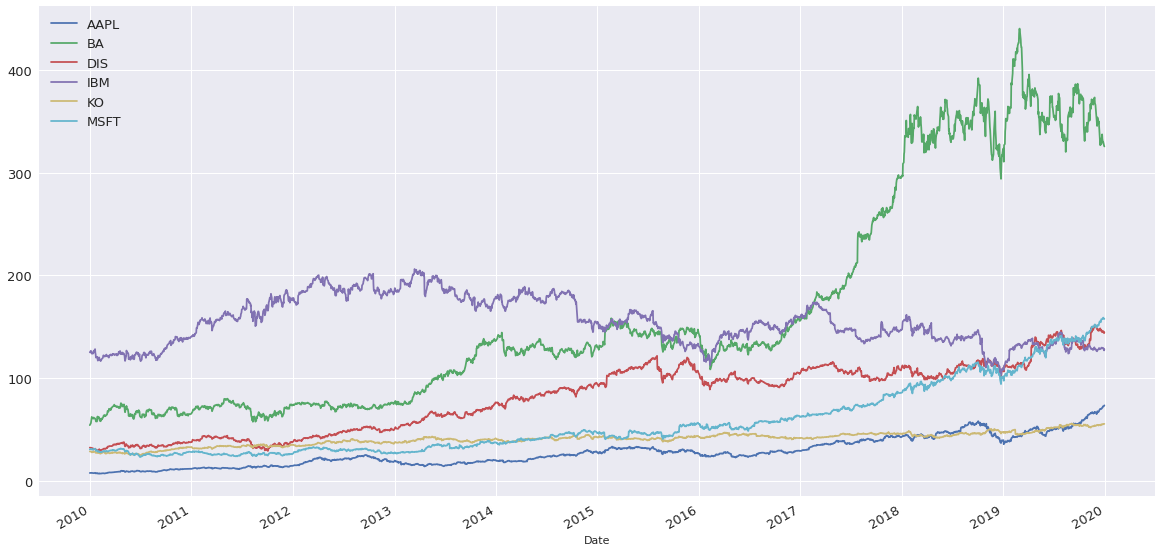

In [14]:
plt.style.use("seaborn")
close.plot(figsize=(20,10), fontsize=13)
plt.legend(fontsize=13)
plt.show()

* it's hard to analyze data as every stock has different value for start, so i'm Normalizing these values to base value(100)

* deviding every column value with the first column value and multiplying it with 100

In [18]:
norm_df = close.div(close.iloc[0]).mul(100)


* Now every value is starting from the same point

In [19]:
norm_df.head(3)

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
2010-01-04,101.556498,103.787178,99.441860,101.184109,100.070177,101.541999
2010-01-05,101.732082,107.186402,99.193798,99.961805,98.859646,101.574802


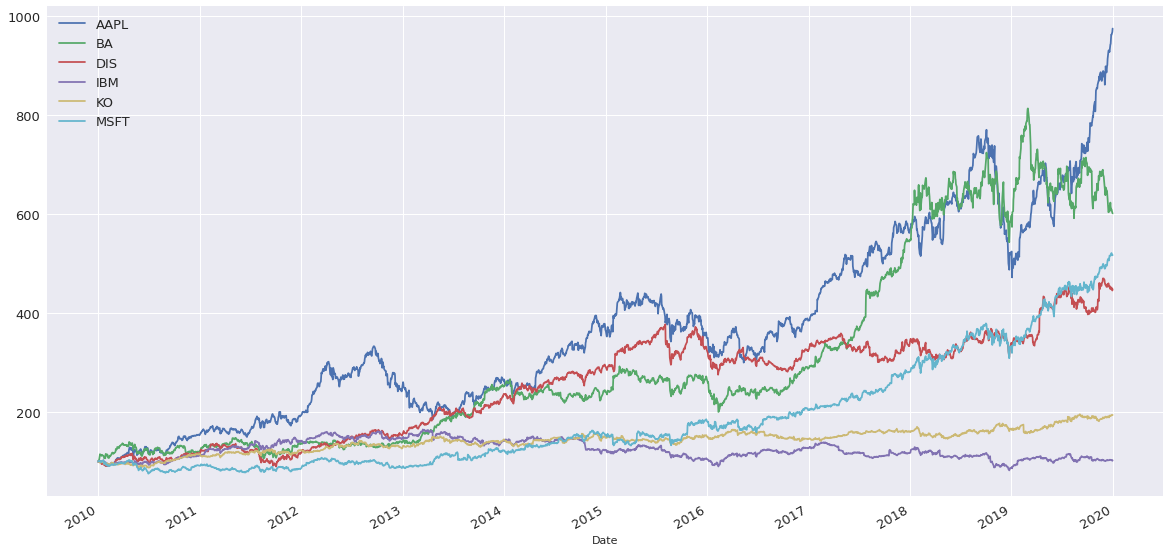

In [20]:
norm_df.plot(figsize=(20,10), fontsize=13)
plt.legend(fontsize=13)
plt.show()